<a href="https://colab.research.google.com/github/ufairahbashir/googlecolab/blob/main/quiz_1_H071201091_Ufairah_Damara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ufairah Damara Bashir
<br>NIM : H071201091

Hilangkan noise periodik pada gambar yang diberikan.

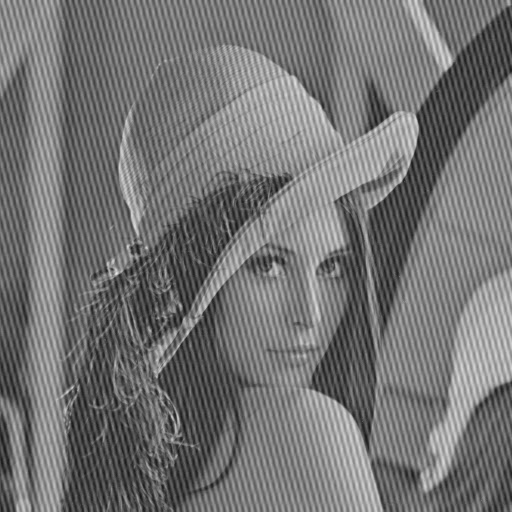

In [ ]:
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnetv2
import numpy as np
import os
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import image

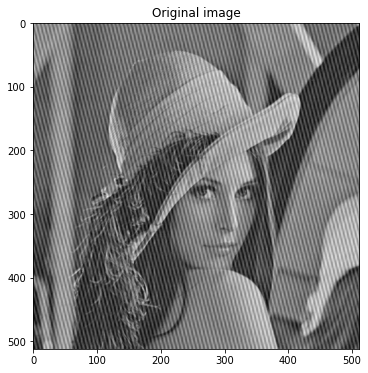

In [ ]:
image = cv2.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/PDC/lena_priodic.bmp',0)

plt.figure(figsize = (10,6))
plt.imshow(image, cmap = 'gray')
plt.title('Original image')
plt.show()

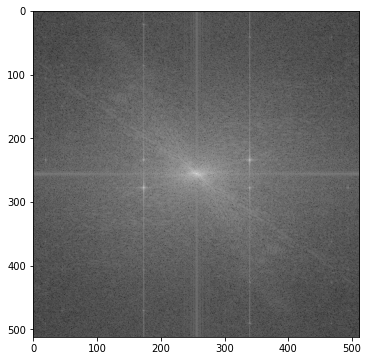

In [ ]:
IM = np.fft.fft2(image)
IMs = np.fft.fftshift(IM)

plt.figure(figsize = (10,6))
plt.imshow(np.log(1+np.absolute(IMs)), cmap = 'gray')
plt.show()

Text(0.5, 1.0, 'Fourier transform')

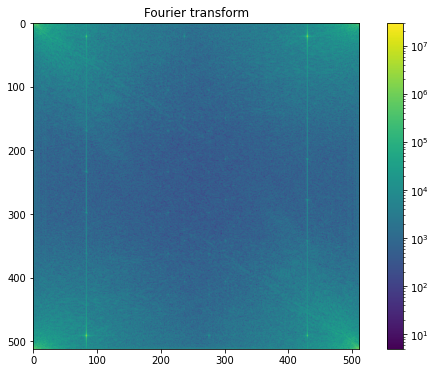

In [ ]:
from scipy import fftpack
im_fft = fftpack.fft2(image)

# tampilkan hasil

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # algritma
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure(figsize = (10,6))
plot_spectrum(im_fft)
plt.title('Fourier transform')

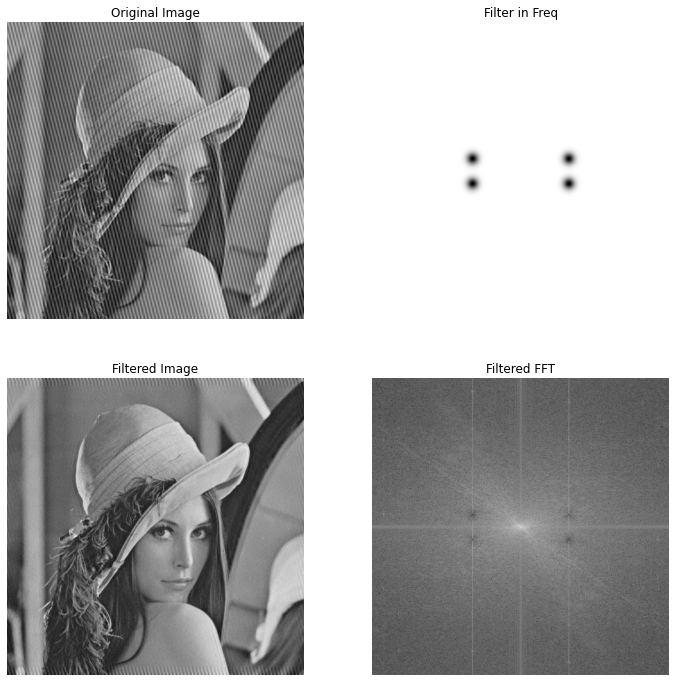

In [ ]:
N = IMs.shape[0]
x, y = np.meshgrid(np.arange(N), np.arange(N))

a1 = 0.009
a2 = 0.009

NF1 = 1 - np.exp(-a1*(x-173)**2 - a2*(y-235)**2) # Gaussian
NF2 = 1 - np.exp(-a1*(x-173)**2 - a2*(y-278)**2) # Gaussian
NF3 = 1 - np.exp(-a1*(x-339)**2 - a2*(y-235)**2) # Gaussian
NF4 = 1 - np.exp(-a1*(x-339)**2 - a2*(y-278)**2) # Gaussian

Z = NF1*NF2*NF3*NF4
IMFs = IMs*Z

IMFr = np.fft.ifftshift(IMFs)
imfr = np.fft.ifft2(IMFr)

plt.figure(figsize = (12,12))

plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(image, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Filter in Freq')
plt.imshow(np.log(1+np.absolute(Z)), cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title('Filtered Image')
plt.imshow(np.real(imfr), cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title('Filtered FFT')
plt.imshow(np.log(1+np.absolute(IMFs)), cmap = 'gray')
plt.axis('off')

plt.show()

In [ ]:
lena = cv2.imread('/content/drive/MyDrive/WORK/PERKULIAHAN/semester4/finalcitra/lena_color.tif',0)

plt.figure(figsize = (10,6))
plt.imshow(coin, cmap = 'gray')
plt.title('Original image lena')
plt.show()